# A demo of K-Means clustering on the handwritten digits data
 * Orignial URL: http://http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
 * Author: scikit-learn developers
 * License: BSD 3 clause
 * Dataflow Notebook Adaptation: Colin Brown

In this example we compare the various initialization strategies for
K-means in terms of runtime and quality of the results.

As the ground truth is known here, we also apply different cluster
quality metrics to judge the goodness of fit of the cluster labels to the
ground truth.

Cluster quality metrics evaluated (see :ref:`clustering_evaluation` for
definitions and discussions of the metrics):

| Shorthand  | full name                   |
|------------|-----------------------------|
| homo       | homogeneity score           |
| compl      | completeness score          |
| v-meas     | V measure                   |
| ARI        | adjusted Rand index         |
| AMI        | adjusted mutual information |
| silhouette | silhouette coefficient      |

In [13601216]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

<function time.time>

<module 'numpy' from '/home/colin/anaconda3/lib/python3.6/site-packages/numpy/__init__.py'>

<module 'matplotlib.pyplot' from '/home/colin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<module 'sklearn.metrics' from '/home/colin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/__init__.py'>

sklearn.cluster.k_means_.KMeans

<function sklearn.datasets.base.load_digits(n_class=10, return_X_y=False)>

sklearn.decomposition.pca.PCA

<function sklearn.preprocessing.data.scale(X, axis=0, with_mean=True, with_std=True, copy=True)>

In [14890164]:
np.random.seed(42)

%split_out load_digits()

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [11798625]:
n_samples, n_features = data.shape


1797

64

In [12297562]:
n_digits, labels, sample_size = len(np.unique(target)), target, 300

10

array([0, 1, 2, ..., 8, 9, 8])

300

In [15100515]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
bench_k_means

<function __main__.bench_k_means(estimator, name, data)>

In [16469533]:
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

k-means++	0.21s	1165725	0.738	0.745	0.741	0.665	0.735	0.183
random   	0.14s	1168538	0.738	0.744	0.741	0.673	0.735	0.185


In [15023546]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12151924]:
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)

PCA-based	0.05s	1188310	0.784	0.787	0.785	0.741	0.782	0.170


In [16550156]:
# #############################################################################
# Visualize the results on PCA-reduced data
reduced_data, kmeans = PCA(n_components=2).fit_transform(data), KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

array([[ -1.25946631,  21.27488762],
       [  7.95761335, -20.76868992],
       [  6.99192153,  -9.95599482],
       ...,
       [ 10.80128284,  -6.96025398],
       [ -4.87209828,  12.42395719],
       [ -0.34439192,   6.36553947]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12766916]:
kmeans.fit(reduced_data)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h, x_min, x_max, y_min, y_max = .02, reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1, reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1     # point in the mesh [x_min, x_max]x[y_min, y_max].

0.02

-32.16990350260063

32.70012452753673

-28.49444354146427

31.092206810600473

In [13747672]:
# Plot the decision boundary. For that, we will assign a color to each
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

array([[-32.1699035, -32.1499035, -32.1299035, ...,  32.6500965,
         32.6700965,  32.6900965],
       [-32.1699035, -32.1499035, -32.1299035, ...,  32.6500965,
         32.6700965,  32.6900965],
       [-32.1699035, -32.1499035, -32.1299035, ...,  32.6500965,
         32.6700965,  32.6900965],
       ...,
       [-32.1699035, -32.1499035, -32.1299035, ...,  32.6500965,
         32.6700965,  32.6900965],
       [-32.1699035, -32.1499035, -32.1299035, ...,  32.6500965,
         32.6700965,  32.6900965],
       [-32.1699035, -32.1499035, -32.1299035, ...,  32.6500965,
         32.6700965,  32.6900965]])

array([[-28.49444354, -28.49444354, -28.49444354, ..., -28.49444354,
        -28.49444354, -28.49444354],
       [-28.47444354, -28.47444354, -28.47444354, ..., -28.47444354,
        -28.47444354, -28.47444354],
       [-28.45444354, -28.45444354, -28.45444354, ..., -28.45444354,
        -28.45444354, -28.45444354],
       ...,
       [ 31.04555646,  31.04555646,  31.04555646, ...,  31.04555646,
         31.04555646,  31.04555646],
       [ 31.06555646,  31.06555646,  31.06555646, ...,  31.06555646,
         31.06555646,  31.06555646],
       [ 31.08555646,  31.08555646,  31.08555646, ...,  31.08555646,
         31.08555646,  31.08555646]])

In [15828635]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

array([[8, 8, 8, ..., 9, 9, 9],
       [8, 8, 8, ..., 9, 9, 9],
       [8, 8, 8, ..., 9, 9, 9],
       ...,
       [7, 7, 7, ..., 4, 4, 4],
       [7, 7, 7, ..., 4, 4, 4],
       [7, 7, 7, ..., 4, 4, 4]], dtype=int32)

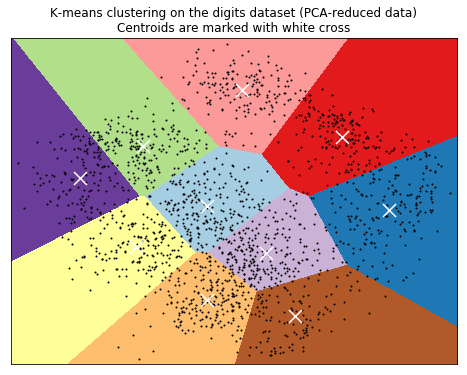

In [12828609]:
# Put the result into a color plot
plt.figure(1, figsize=(8,6))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()